In [17]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from mymodel import *
import matplotlib.pyplot as plt

In [2]:
dset_trn = SceneInstanceDataset(
    instance_dir='C:/Users/Hanna/Desktop/geom_survey/cars_train/1ba30d64da90ea05283ffcfc40c29975/',
    instance_idx=0,
    specific_observation_idcs=None,
    img_sidelength=64,
    num_images=-1)

data_loader = DataLoader(dset_trn, batch_size=2)

dset_val = SceneInstanceDataset(
    instance_dir='C:/Users/Hanna/Desktop/geom_survey/cars_train/1ba30d64da90ea05283ffcfc40c29975/',
    instance_idx=0,
    specific_observation_idcs=None,
    img_sidelength=64,
    num_images=1)
val_data_loader = DataLoader(dset_val, batch_size=2)

In [3]:
my_model = MySRN()
my_model.eval()
my_model.to(device)

MySRN(
  (l2_loss): MSELoss()
  (ray_marcher): Raymarcher(
    (lstm): LSTMCell(256, 16)
    (out_layer): Linear(in_features=16, out_features=1, bias=True)
  )
  (phi): FCBlock(
    (net): Sequential(
      (0): FCLayer(
        (net): Sequential(
          (0): Linear(in_features=3, out_features=256, bias=True)
          (1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (2): ReLU(inplace=True)
        )
      )
      (1): FCLayer(
        (net): Sequential(
          (0): Linear(in_features=256, out_features=256, bias=True)
          (1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (2): ReLU(inplace=True)
        )
      )
      (2): FCLayer(
        (net): Sequential(
          (0): Linear(in_features=256, out_features=256, bias=True)
          (1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (2): ReLU(inplace=True)
        )
      )
      (3): FCLayer(
        (net): Sequential(
          (0): Linear(in_features=256, out_fea

In [4]:
ckpt_path = 'C:/Users/Hanna/Desktop/geom_survey/checkpoint/logs/checkpoints/epoch_0801_iter_100125.pth'
# '/content/gdrive/My Drive/RESEARCH/geom_survey/data/checkpoint/'
if ckpt_path is not None:
    print('Loading model from %s', ckpt_path)
    custom_load(my_model,
          path=ckpt_path)

Loading model from %s C:/Users/Hanna/Desktop/geom_survey/checkpoint/logs/checkpoints/epoch_0801_iter_100125.pth


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


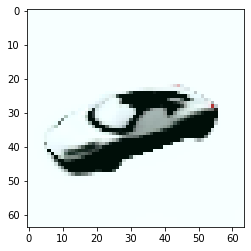

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


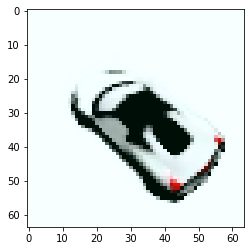

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


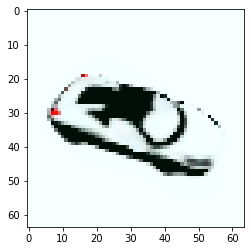

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


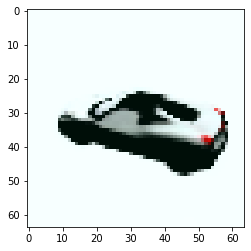

In [5]:
for i, d in enumerate(data_loader):
    if i < 4:
        pred_image = my_model(d)
        plt.imshow(pred_image[0, :, :].reshape(64, 64, 3).detach().cpu().numpy())       
        plt.show()

In [6]:
import math
a = 0.01
rot_x = torch.tensor([[1, 0, 0],
        [0, math.cos(a), -math.sin(a)],
        [0, math.sin(a), math.cos(a)]])

rot_y = torch.tensor([[math.cos(a), 0, math.sin(a)],
        [0, 1, 0],
        [-math.sin(a), 0, math.cos(a)]])

rot_z = torch.tensor([[math.cos(a), -math.sin(a), 0],
        [math.sin(a), math.cos(a), 0],
        [0, 0, 1]])
        

In [30]:
import cv2

fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
out = cv2.VideoWriter('output_001.mp4', fourcc, 2, (64, 64))


In [24]:
rot_x @ d['pose'][0, :3, :3] 

tensor([[-0.5043, -0.3681,  0.7812],
        [-0.8635,  0.2240, -0.4519],
        [-0.0086, -0.9024, -0.4308]])

In [31]:
for d in data_loader:
    break
old_pose = d['pose'].clone()
new_pose = d['pose'].clone()

for i in range(15):
    pred_image = my_model(d)
    tmp = pred_image[0, :, :].reshape(64, 64, 3).detach().cpu().numpy()

    tmp -= tmp.min()
    minmax = tmp.max() - tmp.min()
    tmp /= minmax
    tmp = tmp * 255
    tmp = tmp.astype(np.uint8)

    out.write(tmp)
    
    new_pose[0, :3, :3] = new_pose[0, :3, :3] @ rot_x
    d['pose'] = new_pose
    

out.release()